<a href="https://colab.research.google.com/github/sonal0605/PROJCTS/blob/main/OilPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('crude-oil-price(1).csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
pip install matplotlib seaborn prophet


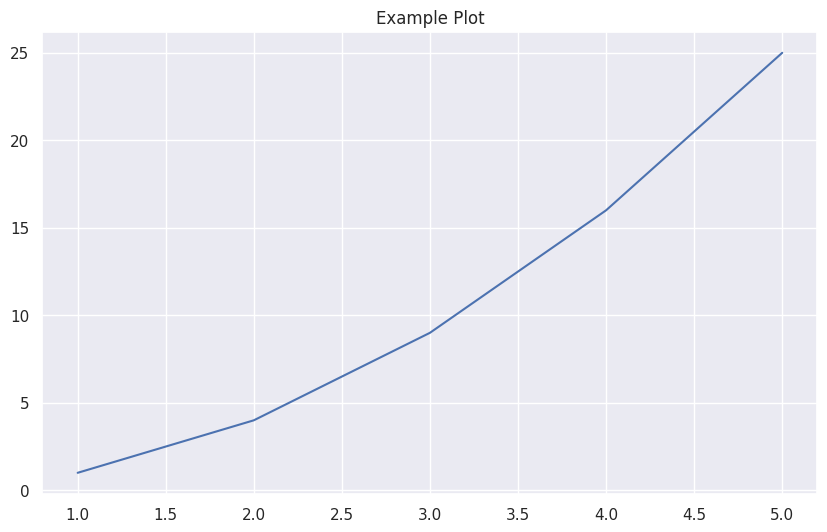

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

%matplotlib inline



In [ ]:
co_data = pd.read_csv('crude-oil-price (1).csv',parse_dates = ['date'])
co_data.head()

,date,price,percentChange,change
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646396,1.36
2,1983-05-02,30.25,-1.240614,-0.38
3,1983-06-01,31.38,3.735537,1.13
4,1983-07-01,32.00,1.975781,0.62


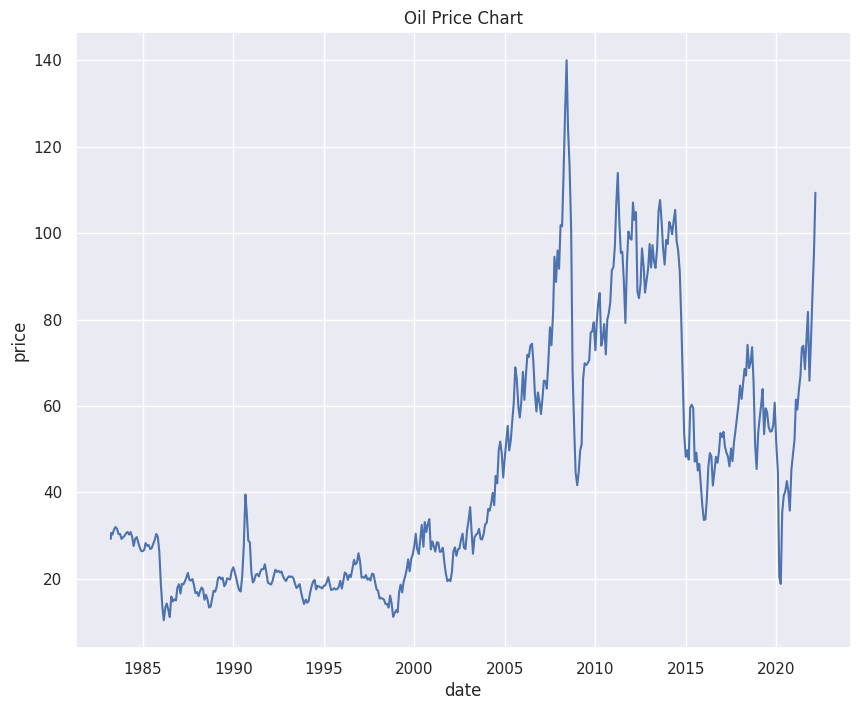

In [ ]:
# Time vs Price line plot
plt.figure(figsize = (10,8))
sns.lineplot(data=co_data, x = 'date', y = 'price')
plt.title('Oil Price Chart')
plt.show()

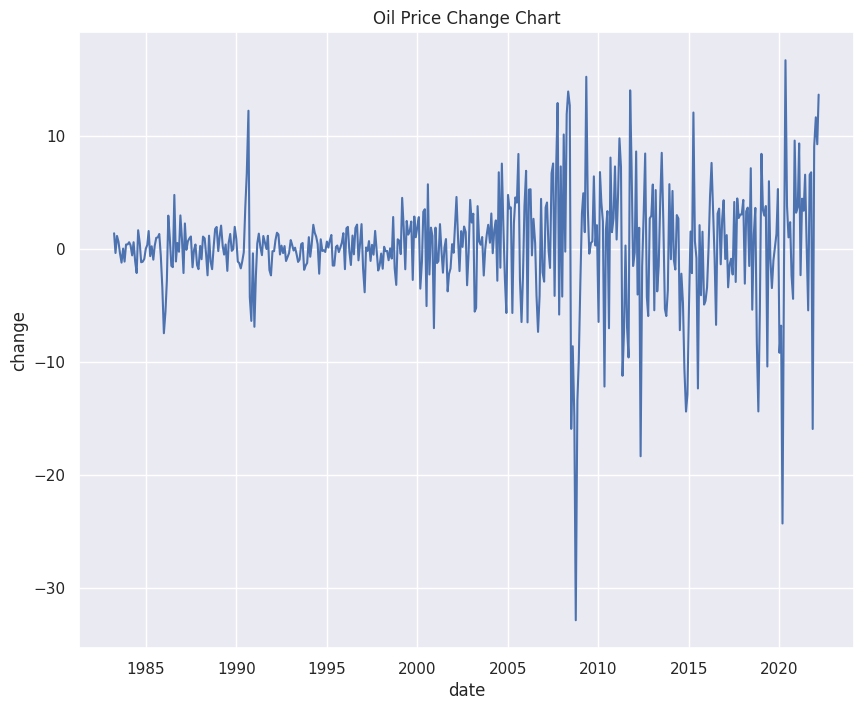

In [ ]:
# Time vs Price line plot
plt.figure(figsize = (10,8))
sns.lineplot(data=co_data, x = 'date', y = 'change')
plt.title('Oil Price Change Chart')
plt.show()

In [ ]:
co_data = co_data.rename(columns = {'date':'ds', 'price':'y'})
co_data.head()

,ds,y,percentChange,change
0,1983-03-30,29.27,NaN,NaN
1,1983-04-04,30.63,4.646396,1.36
2,1983-05-02,30.25,-1.240614,-0.38
3,1983-06-01,31.38,3.735537,1.13
4,1983-07-01,32.00,1.975781,0.62


In [ ]:
#Time series model
model = Prophet()
model.fit(co_data[['ds','y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz03dtkaz/gw5ediuc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz03dtkaz/28vbiqg3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99802', 'data', 'file=/tmp/tmpz03dtkaz/gw5ediuc.json', 'init=/tmp/tmpz03dtkaz/28vbiqg3.json', 'output', 'file=/tmp/tmpz03dtkaz/prophet_modelwdcc7ji5/prophet_model-20240605091158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:11:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:11:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=24,freq = 'M')

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
481,2023-03-31,47.598946,31.864627,65.116093
482,2023-04-30,46.218835,29.623586,63.897590
483,2023-05-31,41.721353,25.873648,59.162264
484,2023-06-30,49.304409,31.633511,65.525363
485,2023-07-31,54.228145,37.126982,71.315982
486,2023-08-31,41.511150,25.233470,56.860262
487,2023-09-30,47.753105,30.683032,65.474937
488,2023-10-31,55.472721,37.838817,73.015539
489,2023-11-30,35.932939,18.751562,53.204495
490,2023-12-31,36.869687,21.112166,52.873306


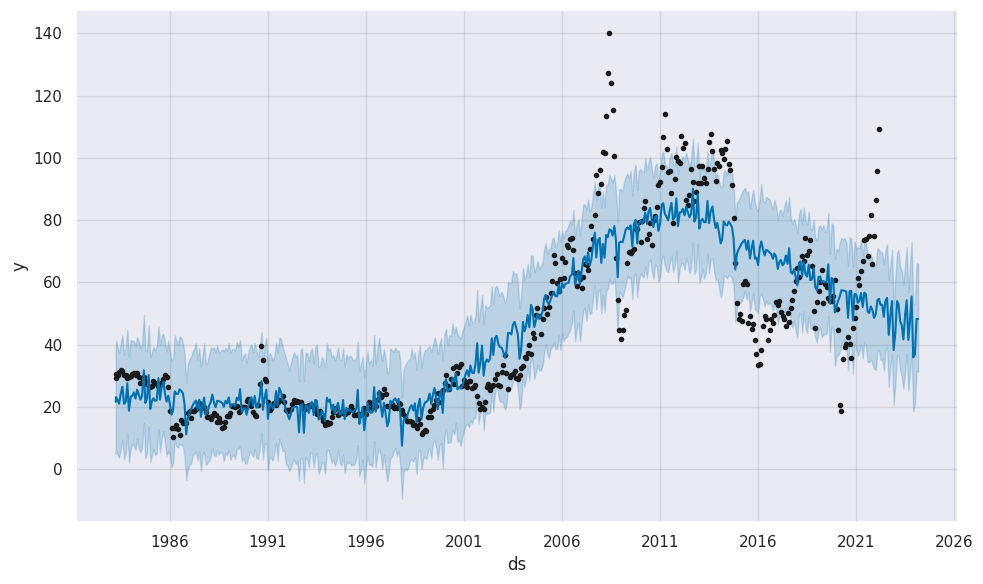

In [ ]:
fig1 = model.plot(forecast)